<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [33]:
df=pd.read_csv('DMV_Written_Tests.csv')
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [35]:
sc=df[['DMV_Test_1', 'DMV_Test_2']]
sc

,DMV_Test_1,DMV_Test_2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [36]:
scores=df[['DMV_Test_1', 'DMV_Test_2']].values
scores

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [37]:
results=df[['Results']].values
results

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

### Task 3: Visualize the Data
---

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [39]:
passed=(results==1).reshape(100,1)
passed

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [40]:
failed=(results==0).reshape(100,1)

In [41]:
scores

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

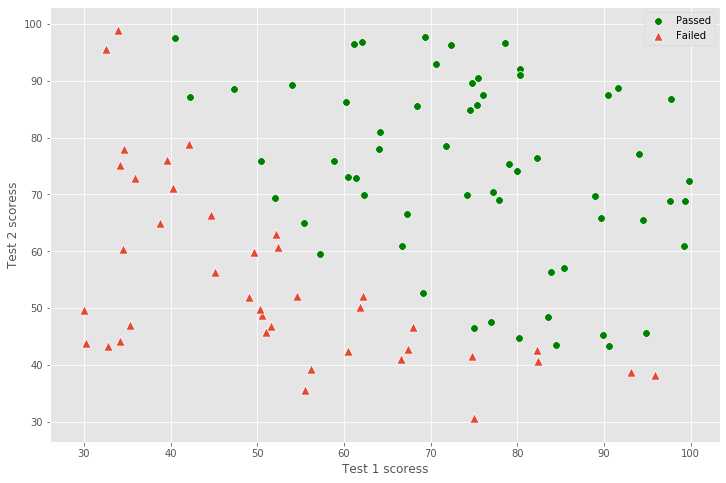

In [42]:
ax=sns.scatterplot(x=scores[passed[:,0],0], #x for test1 and y for test2
                  y=scores[passed[:,0],1], 
                  s=60,
                  color='green') 
ax=sns.scatterplot(x=scores[failed[:,0],0],
                   y=scores[failed[:,0],1], s=85, marker="^") 
ax.set(xlabel='Test 1 scoress', ylabel='Test 2 scoress')
ax.legend(['Passed','Failed'])
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [43]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [44]:
sigmoid(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [45]:
df

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [46]:
def compute_cost(theta,x,y):
    m=len(y)
    y_hat=sigmoid(np.dot(x, theta))
    error=y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
    cost=-1/m*sum(error)
    
    gradient=1/m*(np.dot(x.T,(y_hat-y)))
    
    return cost, gradient

### Task 6: Cost and Gradient at Initialization
---

In [47]:
#Data normalisation
mean_scores=np.mean(scores, axis=0) #mean score for each test
mean_scores

array([65.64427406, 66.22199809])

In [48]:
std_scores=np.std(scores, axis=0)
scores=(scores-mean_scores)/std_scores
scores

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794],
       [-1.06199728, -0.5357394 ],
       [-0.23437234,  1.63818413],
       [ 0.4845113 , -1.06373024],
       [ 0.53998666,  1.14651105],
       [ 0.97044832, -1.22709853],
       [ 1.56075461, -1.51418452],
       [ 0.48393864, -1.92641626],
       [ 0.86065022,  0.55490359],
       [ 0.1921582 ,  1.70347834],
       [-1.34839922,  0.53082781],
       [-0.60293429,  1.24314792],
       [ 0.17694982, -0.72913975],
       [ 0.11893077, -1.05699346],
       [ 0.25914553,  1.44433023],
       [ 0.58543944, -1.00845873],
       [ 0.0892403 , -1.26468472],
       [ 1.2413042 , -0.02285779],
       [-0.78042096, -0.93923898],
       [-1.62350714, -1.19053019],
       [ 0.63426559,  0.14875155],
       [-0.17423248,  0.20186768],
       [ 0.75131151, -1.15742514],
       [ 1.41886056, -1.4830648 ],
       [-0.19700066,

In [49]:
rows=scores.shape[0]#gives number of rows and columns
cols=scores.shape[1]
rows
cols

2

In [50]:
df.info

<bound method DataFrame.info of     DMV_Test_1  DMV_Test_2  Results
0    34.623660   78.024693        0
1    30.286711   43.894998        0
2    35.847409   72.902198        0
3    60.182599   86.308552        1
4    79.032736   75.344376        1
..         ...         ...      ...
95   83.489163   48.380286        1
96   42.261701   87.103851        1
97   99.315009   68.775409        1
98   55.340018   64.931938        1
99   74.775893   89.529813        1

[100 rows x 3 columns]>

In [51]:
X=np.append(np.ones((rows,1)), scores, axis=1) #one introced for bias multiplication in matrix
X

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        ,  0.48393864, -1.92641626],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  0.1921582 ,  1.70347834],
       [ 1.        , -1.34839922,  0.53082781],
       [ 1.        , -0.60293429,  1.24314792],
       [ 1.        ,  0.17694982, -0.72913975],
       [ 1.        ,  0.11893077, -1.05699346],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        ,  0.58543944, -1.00845873],
       [ 1.        ,  0.0892403 , -1.264

In [52]:
results

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [53]:
y=results.reshape(rows,1)

theta_init=np.zeros((cols+1,1))
theta_init

array([[0.],
       [0.],
       [0.]])

In [54]:
cost, gradient = compute_cost(theta_init, X, y)
print('Cost at initialisation', cost)
print('Gradient', gradient)

Cost at initialisation [0.69314718]
Gradient [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [57]:
def gradient_descent(x,y,theta, alpha, iterations):
    costs=[]
    for i in range (iterations):
        cost, gradient=compute_cost(theta,x,y)
        theta -= alpha*gradient
        costs.append(cost)
    return theta, costs    

In [58]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [59]:
print("Theta after running gradient descent:", theta)
print("Resulting cost", costs[-1])

Theta after running gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost [0.20489382]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

In [62]:
costs

[array([0.69314718]),
 array([0.55940324]),
 array([0.48058766]),
 array([0.43046342]),
 array([0.39605647]),
 array([0.37096693]),
 array([0.35181144]),
 array([0.33666258]),
 array([0.32434848]),
 array([0.31411699]),
 array([0.30546329]),
 array([0.29803573]),
 array([0.29158158]),
 array([0.28591434]),
 array([0.2808932]),
 array([0.27640977]),
 array([0.27237912]),
 array([0.26873374]),
 array([0.26541921]),
 array([0.26239115]),
 array([0.25961295]),
 array([0.25705417]),
 array([0.25468922]),
 array([0.25249645]),
 array([0.25045738]),
 array([0.24855618]),
 array([0.24677915]),
 array([0.2451144]),
 array([0.24355154]),
 array([0.24208146]),
 array([0.24069613]),
 array([0.23938843]),
 array([0.23815205]),
 array([0.23698135]),
 array([0.23587129]),
 array([0.23481732]),
 array([0.23381537]),
 array([0.23286175]),
 array([0.23195312]),
 array([0.23108643]),
 array([0.23025893]),
 array([0.22946809]),
 array([0.22871161]),
 array([0.22798736]),
 array([0.2272934]),
 array([0.226

In [65]:
cost.shape

(1,)

Text(0.5, 1.0, 'Value of cost over iterations')

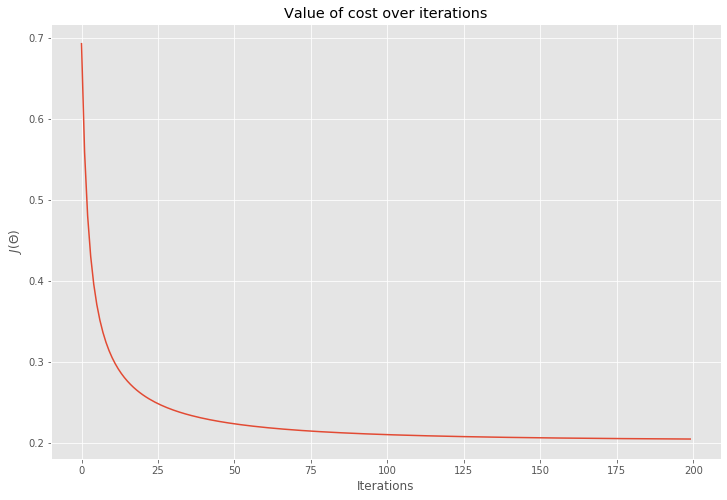

In [69]:
plt.plot(costs) #you can even plot a list directly...without any x
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Value of cost over iterations")

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

In [70]:
theta

array([[1.50850586],
       [3.5468762 ],
       [3.29383709]])

In [72]:
X #normalised scores

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        ,  0.48393864, -1.92641626],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  0.1921582 ,  1.70347834],
       [ 1.        , -1.34839922,  0.53082781],
       [ 1.        , -0.60293429,  1.24314792],
       [ 1.        ,  0.17694982, -0.72913975],
       [ 1.        ,  0.11893077, -1.05699346],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        ,  0.58543944, -1.00845873],
       [ 1.        ,  0.0892403 , -1.264

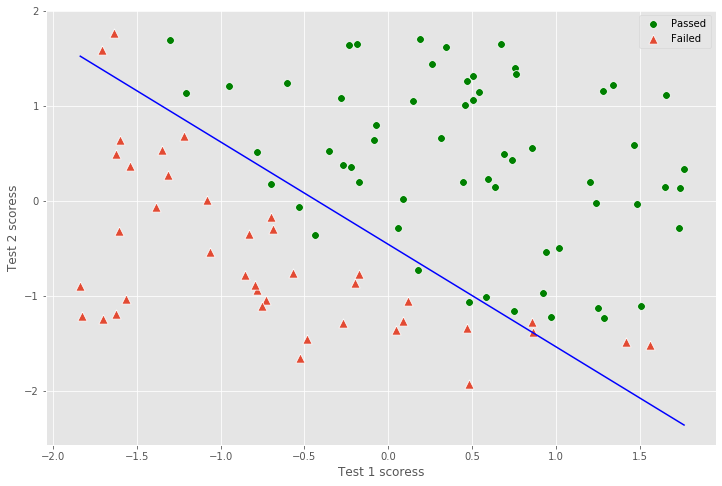

In [78]:
ax=sns.scatterplot(x=X[passed[:,0],1], #x for test1 and y for test2
                  y=X[passed[:,0],2], 
                  s=60,
                  color='green') 
ax=sns.scatterplot(x=X[failed[:,0],1],
                   y=X[failed[:,0],2], s=85, marker="^") 
ax.set(xlabel='Test 1 scoress', ylabel='Test 2 scoress')
ax.legend(['Passed','Failed'])

x_boundary=np.array([np.min(X[:,1]), np.max(X[:,1])]) #taken just 2 points nad plotted the dataset
y_boundary=-(theta[0]+theta[1]*x_boundary)/theta[2]
sns.lineplot(x=x_boundary,y=y_boundary, color="blue")

plt.show()

In [80]:
x_boundary

array([-1.83802631,  1.76561835])

In [81]:
y_boundary

array([ 1.52124886, -2.35923495])

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [82]:
def predict(theta,x):
    result = x.dot(theta)
    return result>0

In [88]:
#Training accuracy
p=predict(theta,X)
p

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [92]:
p.shape

(100, 1)

In [86]:
p==y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [87]:
sum(p==y)

array([89])

In [94]:
print("Training accuracy is",sum(p==y)[0], "%")

Training accuracy is 89 %


In [107]:
test=np.array([80,60])

#Standarasing the data
test=(test-mean_scores)/std_scores #normalised as in general case
test=np.append(np.ones(1), test) #as we have appended one

In [108]:
probability=sigmoid(test.dot(theta))
probability

array([0.95391361])

In [109]:
print("The probability for that student to pass is:", np.round(probability[0],2))

The probability for that student to pass is: 0.95
